## Overview

### 1.Problem Definition
### 2.Import Train Data
### 3.Cleaning The Dataset
### 4.EDA
### 5.Modelling
### 6.Make Predictions
### 7.Import Test Data
### 8.Cleaning The Dataset
### 9.Make Predictions
### 10.Saving The File.

**-----------------------------------------------------------------------------------------------------------------------**

## 1. Problem Definition

**Make House Price Prediction Using Advanced Regression Techniques**

## 2. Import Train Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
train_data.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


<AxesSubplot:>

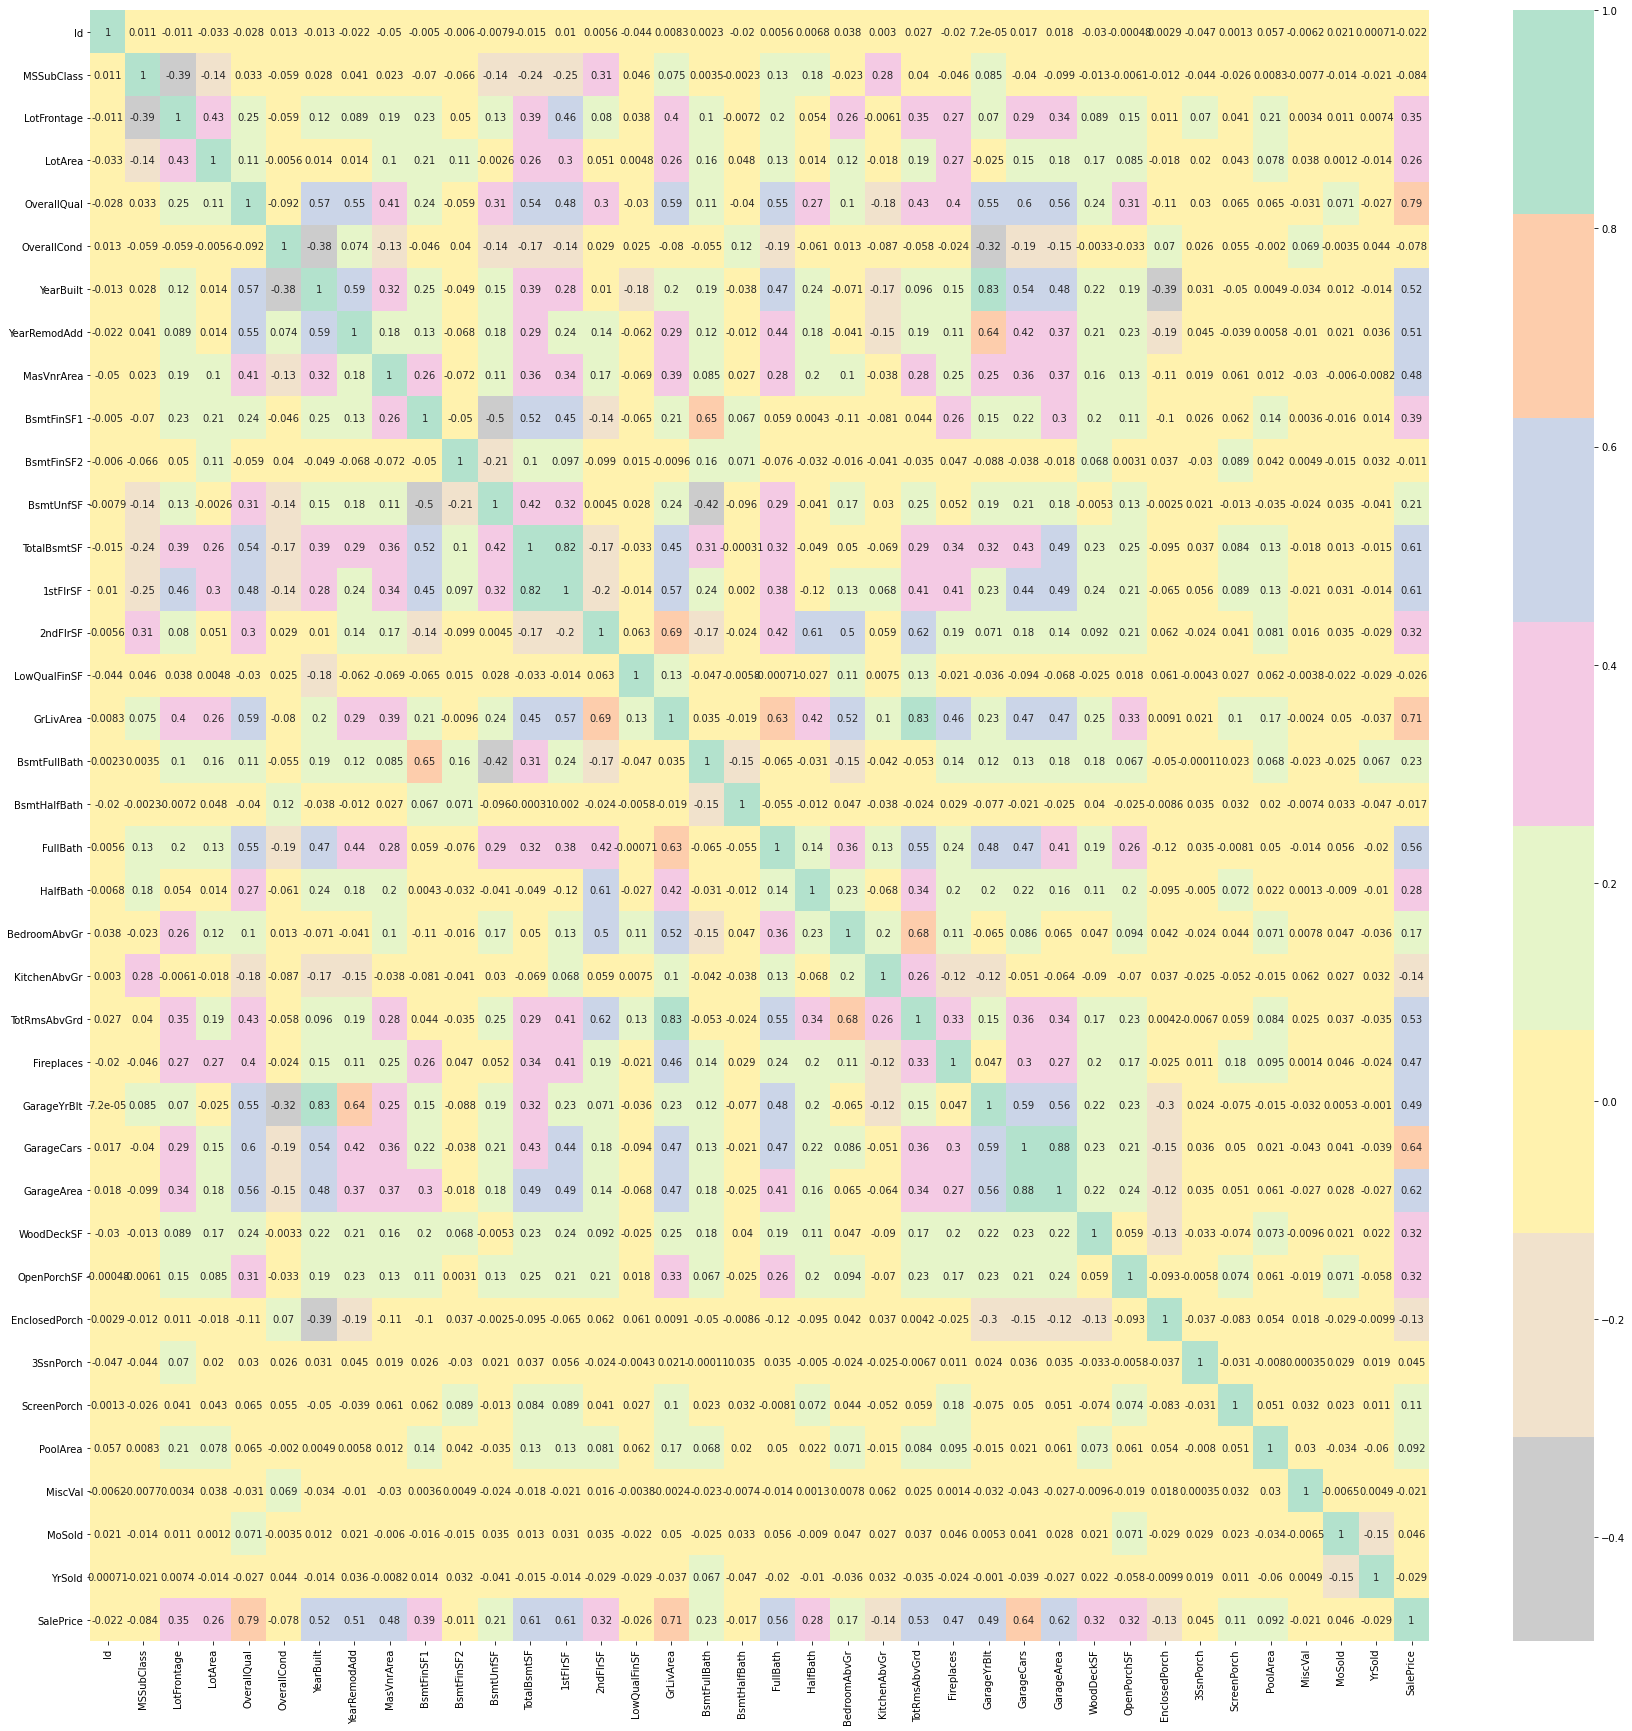

In [6]:
## Correlation
plt.figure(figsize=(30,30))
sns.heatmap(train_data.corr(),
           annot=True,
           cmap='Pastel2_r')

## 3. Clean Dataset

In [7]:
# Check the missing values
train_data.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [8]:
# check dtypes
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [9]:
# Create a function that can turn 'object' into 'numerical' and fill missing_values
def preprocess_data(df):
    for label, content in df.items():
        # Checking the numeric dtypes
        if pd.api.types.is_numeric_dtype(content):
            # checking the missing_values
            if pd.isnull(content).sum():
                # filling the missing values with median
                df[label] = content.fillna(content.median())
        #Checking the non numeric dtypes
        if not pd.api.types.is_numeric_dtype(content):
            # convert object dtype to int
            df[label] = pd.Categorical(content).codes+1
     #return data       
    return df

In [10]:
df = preprocess_data(df=train_data)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,4,65.0,8450,2,0,4,4,1,5,1,6,3,3,1,6,7,5,2003,2003,2,2,13,14,2,196.0,3,5,3,3,4,4,3,706,6,0,150,856,2,1,2,5,856,854,0,1710,1,0,2,1,3,1,3,8,7,0,0,2,2003.0,2,2,548,5,5,3,0,61,0,0,0,0,0,0,0,0,2,2008,9,5,208500
1,2,20,4,80.0,9600,2,0,4,4,1,3,1,25,2,3,1,3,6,8,1976,1976,2,2,9,9,3,0.0,4,5,2,3,4,2,1,978,6,0,284,1262,2,1,2,5,1262,0,0,1262,0,1,2,0,3,1,4,6,7,1,5,2,1976.0,2,2,460,5,5,3,298,0,0,0,0,0,0,0,0,0,5,2007,9,5,181500
2,3,60,4,68.0,11250,2,0,1,4,1,5,1,6,3,3,1,6,7,5,2001,2002,2,2,13,14,2,162.0,3,5,3,3,4,3,3,486,6,0,434,920,2,1,2,5,920,866,0,1786,1,0,2,1,3,1,3,6,7,1,5,2,2001.0,2,2,608,5,5,3,0,42,0,0,0,0,0,0,0,0,9,2008,9,5,223500
3,4,70,4,60.0,9550,2,0,1,4,1,1,1,7,3,3,1,6,7,5,1915,1970,2,2,14,16,3,0.0,4,5,1,4,2,4,1,216,6,0,540,756,2,3,2,5,961,756,0,1717,1,0,1,0,3,1,3,7,7,1,3,6,1998.0,3,3,642,5,5,3,0,35,272,0,0,0,0,0,0,0,2,2006,9,1,140000
4,5,60,4,84.0,14260,2,0,1,4,1,3,1,16,3,3,1,6,8,5,2000,2000,2,2,13,14,2,350.0,3,5,3,3,4,1,3,655,6,0,490,1145,2,1,2,5,1145,1053,0,2198,1,0,2,1,4,1,3,9,7,1,5,2,2000.0,2,3,836,5,5,3,192,84,0,0,0,0,0,0,0,0,12,2008,9,5,250000


In [11]:
# Check again the missing values 
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [12]:
# Check again the dtypes
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning            int8
LotFrontage      float64
LotArea            int64
Street              int8
Alley               int8
LotShape            int8
LandContour         int8
Utilities           int8
LotConfig           int8
LandSlope           int8
Neighborhood        int8
Condition1          int8
Condition2          int8
BldgType            int8
HouseStyle          int8
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle           int8
RoofMatl            int8
Exterior1st         int8
Exterior2nd         int8
MasVnrType          int8
MasVnrArea       float64
ExterQual           int8
ExterCond           int8
Foundation          int8
BsmtQual            int8
BsmtCond            int8
BsmtExposure        int8
BsmtFinType1        int8
BsmtFinSF1         int64
BsmtFinType2        int8
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating             int8


## 4. EDA

In [13]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

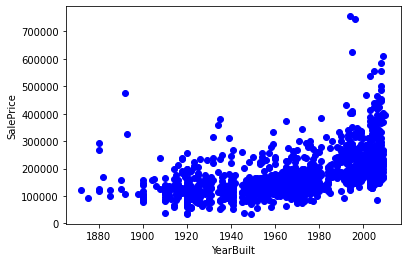

In [14]:
plt.scatter(df.YearBuilt, df.SalePrice, c = "blue")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.show()

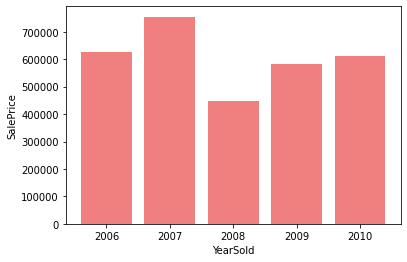

In [15]:
plt.bar( df.YrSold, df.SalePrice,  color = "lightcoral")
plt.xlabel("YearSold")
plt.ylabel("SalePrice")
plt.show()

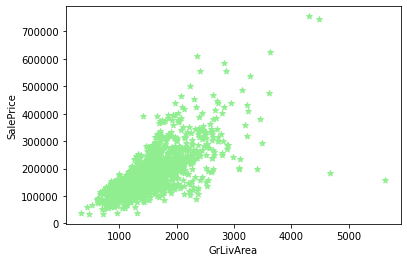

In [16]:
plt.scatter(df.GrLivArea, df.SalePrice, c='lightgreen', marker='*')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

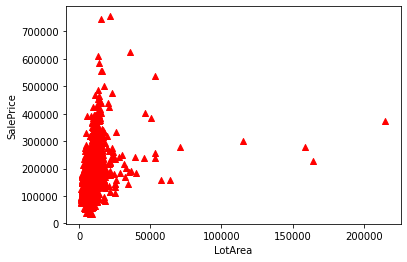

In [17]:
plt.scatter(df.LotArea, df.SalePrice, c = "red", marker ="^")
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.show()

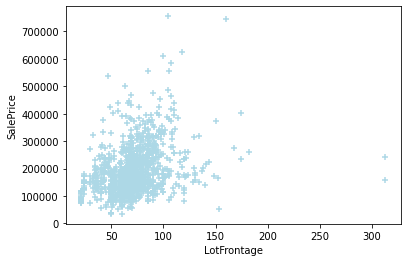

In [18]:
plt.scatter(df.LotFrontage, df.SalePrice, c = "lightblue", marker ="+")
plt.xlabel("LotFrontage")
plt.ylabel("SalePrice")
plt.show()

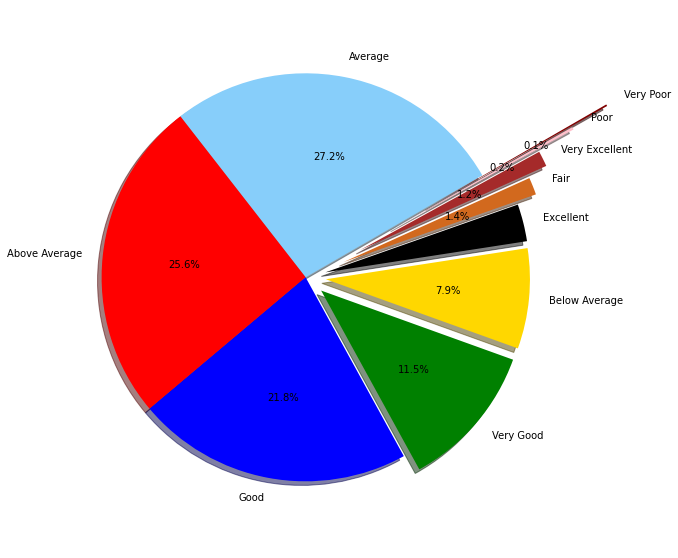

In [19]:
labels = 'Average', 'Above Average', 'Good', 'Very Good', 'Below Average','Excellent', 'Fair', 'Very Excellent', 'Poor', 'Very Poor' 
explode = (0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.2, 0.3, 0.5, 0.7)

NUM_COLORS = len(explode)

fig1, ax1 = plt.subplots(figsize=(10, 10))
colors = ['lightskyblue', 'red', 'blue', 'green', 'gold', 'black', 'chocolate', 'brown', 'pink', 'maroon']
ax1.pie(df['OverallQual'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=30, colors=colors)
#Theme
ax1.axis('equal')
plt.show()

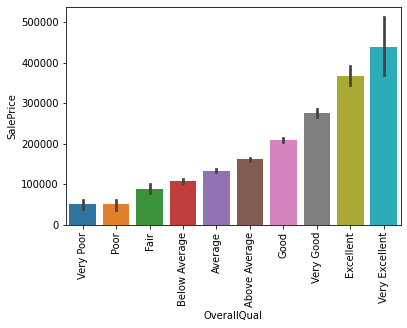

In [20]:
fig = sns.barplot(x = 'OverallQual',y = 'SalePrice', data = df)
fig.set_xticklabels(labels=['Very Poor', 'Poor', 'Fair', 'Below Average', 'Average', 'Above Average', 'Good', 'Very Good', 'Excellent', 'Very Excellent'], rotation=90);

## 5. Modelling

In [21]:
# Split the dataset
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_val), len(y_train), len(y_val)

(1168, 292, 1168, 292)

### RandomForestRegressor

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
np.random.seed(42)

rg = RandomForestRegressor()
rg.fit(X_train, y_train)

y_preds = rg.predict(X_val)

print(f"Score : {rg.score(X_val, y_val)}")
print(f"Cross_val_score : {np.mean(cross_val_score(rg, X, y, cv=5))}")
print(f"Root_mean_squared_error {np.sqrt(mean_squared_error(y_val, y_preds))}")

Score : 0.8898638953723962
Cross_val_score : 0.8608054929711468
Root_mean_squared_error 29065.09676024858


## GradientBoostingRegressor

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

np.random.seed(42)
rg2 = GradientBoostingRegressor()
rg2.fit(X_train, y_train)
y_preds = rg2.predict(X_val)

print(f"Score : {rg2.score(X_val, y_val)}")
print(f"Cross_val_score : {np.mean(cross_val_score(rg2, X, y, cv=5))}")
print(f"Root_mean_squared_error {np.sqrt(mean_squared_error(y_val, y_preds))}")

Score : 0.8997258471514695
Cross_val_score : 0.8871554945456811
Root_mean_squared_error 27733.29159147127


### AdaBoostRegressor

In [24]:
from sklearn.ensemble import AdaBoostRegressor

np.random.seed(42)
rg3 = AdaBoostRegressor()
rg3.fit(X_train, y_train)
y_preds = rg3.predict(X_val)

print(f"Score : {rg3.score(X_val, y_val)}")
print(f"Cross_val_score : {np.mean(cross_val_score(rg3, X, y, cv=5))}")
print(f"Root_mean_squared_error {np.sqrt(mean_squared_error(y_val, y_preds))}")

Score : 0.8251492087624654
Cross_val_score : 0.8109295746163703
Root_mean_squared_error 36621.88698547176


### LASSO

In [25]:
from sklearn.linear_model import Lasso

np.random.seed(42)
rg4 = Lasso()
rg4.fit(X_train, y_train)
y_preds = rg4.predict(X_val)

print(f"Score : {rg4.score(X_val, y_val)}")
print(f"Cross_val_score : {np.mean(cross_val_score(rg4, X, y, cv=5))}")
print(f"Root_mean_squared_error {np.sqrt(mean_squared_error(y_val, y_preds))}")

Score : 0.8174268243755685
Cross_val_score : 0.7785077554128865
Root_mean_squared_error 37421.86277727841


### ElasticNet

In [26]:
from sklearn.linear_model import ElasticNet

np.random.seed(42)
rg5 = ElasticNet()
rg5.fit(X_train, y_train)
y_preds = rg5.predict(X_val)

print(f"Score : {rg5.score(X_val, y_val)}")
print(f"Cross_val_score : {np.mean(cross_val_score(rg5, X, y, cv=5))}")
print(f"Root_mean_squared_error {np.sqrt(mean_squared_error(y_val, y_preds))}")

Score : 0.8451597635921265
Cross_val_score : 0.8039807357641671
Root_mean_squared_error 34462.66274167395


### Ridge

In [27]:
from sklearn.linear_model import Ridge

np.random.seed(42)
rg6 = Ridge()
rg6.fit(X_train, y_train)
y_preds = rg6.predict(X_val)

print(f"Score : {rg6.score(X_val, y_val)}")
print(f"Cross_val_score : {np.mean(cross_val_score(rg6, X, y, cv=5))}")
print(f"Root_mean_squared_error {np.sqrt(mean_squared_error(y_val, y_preds))}")

Score : 0.8330542513425792
Cross_val_score : 0.8056420452486659
Root_mean_squared_error 35784.47080935374


## XGBoostRegressor

In [28]:
from xgboost import XGBRegressor

np.random.seed(42)
rg7 = XGBRegressor()
rg7.fit(X_train, y_train)
y_preds = rg7.predict(X_val)

print(f"Score : {rg7.score(X_val, y_val)}")
print(f"Cross_val_score : {np.mean(cross_val_score(rg7, X, y, cv=5))}")
print(f"Root_mean_squared_error {np.sqrt(mean_squared_error(y_val, y_preds))}")

Score : 0.9029589004086759
Cross_val_score : 0.8721556923716951
Root_mean_squared_error 27282.53817681905


### LGBMRegressor

In [29]:
from lightgbm import LGBMRegressor

np.random.seed(42)
rg8 = LGBMRegressor()
rg8.fit(X_train, y_train)
y_preds = rg8.predict(X_val)

print(f"Score : {rg8.score(X_val, y_val)}")
print(f"Cross_val_score : {np.mean(cross_val_score(rg8, X, y, cv=5))}")
print(f"Root_mean_squared_error {np.sqrt(mean_squared_error(y_val, y_preds))}")

Score : 0.8837989102852334
Cross_val_score : 0.8692574771522343
Root_mean_squared_error 29854.6522964659


### DecisionTreeRegressor

In [30]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
rg9 = DecisionTreeRegressor()
rg9.fit(X_train, y_train)
y_preds = rg9.predict(X_val)

print(f"Score : {rg9.score(X_val, y_val)}")
print(f"Cross_val_score : {np.mean(cross_val_score(rg9, X, y, cv=5))}")
print(f"Root_mean_squared_error {np.sqrt(mean_squared_error(y_val, y_preds))}")

Score : 0.7695368163669544
Cross_val_score : 0.6740903029818216
Root_mean_squared_error 42044.35511709424


### CatBoostRegressor

In [31]:
from catboost import CatBoostRegressor

np.random.seed(42)
rg10 = CatBoostRegressor()
rg10.fit(X_train, y_train)
y_preds = rg10.predict(X_val)

print(f"Score : {rg10.score(X_val, y_val)}")
print(f"Cross_val_score : {np.mean(cross_val_score(rg10, X, y, cv=5))}")
print(f"Root_mean_squared_error {np.sqrt(mean_squared_error(y_val, y_preds))}")

Learning rate set to 0.040124
0:	learn: 75374.8335190	total: 56.1ms	remaining: 56.1s
1:	learn: 73526.3048450	total: 59.8ms	remaining: 29.8s
2:	learn: 71574.9828808	total: 63.1ms	remaining: 21s
3:	learn: 69793.9783549	total: 66.5ms	remaining: 16.5s
4:	learn: 67965.4501720	total: 70.1ms	remaining: 13.9s
5:	learn: 66296.7973529	total: 73.6ms	remaining: 12.2s
6:	learn: 64636.3478665	total: 77.1ms	remaining: 10.9s
7:	learn: 63296.4545014	total: 80.4ms	remaining: 9.97s
8:	learn: 61778.4499774	total: 83.7ms	remaining: 9.22s
9:	learn: 60364.8501039	total: 87.2ms	remaining: 8.63s
10:	learn: 59107.1117872	total: 90.6ms	remaining: 8.14s
11:	learn: 57833.2373148	total: 94ms	remaining: 7.74s
12:	learn: 56497.3556120	total: 97.5ms	remaining: 7.4s
13:	learn: 55389.8307163	total: 101ms	remaining: 7.11s
14:	learn: 54266.3128599	total: 104ms	remaining: 6.85s
15:	learn: 53228.8737774	total: 108ms	remaining: 6.62s
16:	learn: 52241.7879125	total: 111ms	remaining: 6.43s
17:	learn: 51376.6405717	total: 115ms

### 6. Make Prediction 

from model which performed the best

In [32]:
model = XGBRegressor()
np.random.seed(42)
model.fit(X_train, y_train)
y_preds = model.predict(X_val)
y_preds

array([139608.36 , 333050.28 , 107337.92 , 166020.97 , 341683.78 ,
        85245.68 , 240146.08 , 149668.19 ,  84513.13 , 124815.445,
       142224.25 , 120708.09 , 100884.69 , 185106.61 , 175256.77 ,
       136943.83 , 186189.62 , 138078.34 , 118925.98 , 206485.75 ,
       163946.05 , 231402.97 , 172357.05 , 121578.21 , 196119.05 ,
       166040.34 , 198414.6  , 104371.47 , 180543.1  , 217087.81 ,
       133823.77 , 250236.56 , 206072.2  , 113834.695, 242325.11 ,
       147997.42 , 120668.41 , 198942.5  , 322811.97 , 100866.9  ,
       117180.93 , 235933.7  , 117614.59 , 372052.88 , 130350.016,
       153617.77 , 115712.125, 124402.54 , 431157.03 , 138319.44 ,
       116942.37 , 216634.38 , 101962.086, 364016.78 , 140959.   ,
       243120.4  , 197477.52 , 163102.62 , 150932.08 , 106878.445,
        61286.887, 153612.23 , 301594.84 , 304416.1  , 296299.3  ,
       247325.   , 104991.08 , 290282.44 , 123865.88 , 178380.06 ,
       119878.14 , 123788.83 , 115717.73 ,  88127.96 , 454381.

### 7. Import Test Dataset

In [33]:
test_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### 8.Cleaning The Test Dataset

In [34]:
test_data = preprocess_data(df=test_data)
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3,80.0,11622,2,0,4,4,1,5,1,13,2,3,1,3,5,6,1961,1961,2,1,11,13,3,0.0,4,5,2,4,4,4,5,468.0,4,144.0,270.0,882.0,1,5,2,4,896,0,0,896,0.0,0.0,1,0,2,1,4,5,7,0,0,2,1961.0,3,1.0,730.0,4,5,3,140,0,0,0,120,0,0,3,0,0,6,2010,9,5
1,1462,20,4,81.0,14267,2,0,1,4,1,1,1,13,3,3,1,3,6,6,1958,1958,4,1,12,14,2,108.0,4,5,2,4,4,4,1,923.0,6,0.0,406.0,1329.0,1,5,2,4,1329,0,0,1329,0.0,0.0,1,1,3,1,3,6,7,0,0,2,1958.0,3,1.0,312.0,4,5,3,393,36,0,0,0,0,0,0,1,12500,6,2010,9,5
2,1463,60,4,74.0,13830,2,0,1,4,1,5,1,9,3,3,1,5,5,5,1997,1998,2,1,11,13,3,0.0,4,5,3,3,4,4,3,791.0,6,0.0,137.0,928.0,1,3,2,4,928,701,0,1629,0.0,0.0,2,1,3,1,4,6,7,1,5,2,1997.0,1,2.0,482.0,4,5,3,212,34,0,0,0,0,0,3,0,0,3,2010,9,5
3,1464,60,4,78.0,9978,2,0,1,4,1,5,1,9,3,3,1,5,6,6,1998,1998,2,1,11,13,2,20.0,4,5,3,4,4,4,3,602.0,6,0.0,324.0,926.0,1,1,2,4,926,678,0,1604,0.0,0.0,2,1,3,1,3,7,7,1,3,2,1998.0,1,2.0,470.0,4,5,3,360,36,0,0,0,0,0,0,0,0,6,2010,9,5
4,1465,120,4,43.0,5005,2,0,1,2,1,5,1,23,3,3,5,3,8,5,1992,1992,2,1,7,7,3,0.0,3,5,3,3,4,4,1,263.0,6,0.0,1017.0,1280.0,1,1,2,4,1280,0,0,1280,0.0,0.0,2,0,2,1,3,5,7,0,0,2,1992.0,2,2.0,506.0,4,5,3,0,82,0,0,144,0,0,0,0,0,1,2010,9,5


In [35]:
# check again
test_data.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [36]:
test_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning            int8
LotFrontage      float64
LotArea            int64
Street              int8
Alley               int8
LotShape            int8
LandContour         int8
Utilities           int8
LotConfig           int8
LandSlope           int8
Neighborhood        int8
Condition1          int8
Condition2          int8
BldgType            int8
HouseStyle          int8
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle           int8
RoofMatl            int8
Exterior1st         int8
Exterior2nd         int8
MasVnrType          int8
MasVnrArea       float64
ExterQual           int8
ExterCond           int8
Foundation          int8
BsmtQual            int8
BsmtCond            int8
BsmtExposure        int8
BsmtFinType1        int8
BsmtFinSF1       float64
BsmtFinType2        int8
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating             int8


### 9. Make Prediction On Test Dataset

In [37]:
model = XGBRegressor()
np.random.seed(42)
model.fit(X_train, y_train)
predictions = model.predict(test_data)
model.score(X_val, y_val)

0.9029589004086759

In [38]:
predictions

array([121430.305, 162276.14 , 185829.12 , ..., 178208.33 ,  94454.93 ,
       213480.05 ], dtype=float32)

In [39]:
# make a dataframe which we are going to submit
result = pd.DataFrame()
result['Id'] = test_data['Id']
result['SalePrice'] = predictions

In [40]:
result.head()

,Id,SalePrice
0,1461,121430.304688
1,1462,162276.140625
2,1463,185829.125000
3,1464,208165.421875
4,1465,186805.765625


In [41]:
sample = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


### 10.Saving The File

In [42]:
result.to_csv('result.csv', index=False)